
1. Load our dataset and libraries
2. Prepare our data via upsampling and backfilling
3. Identify the p, d, and q terms for our ARIMA model through statistical and visual methods
4. Train an ARIMA model
5. Compare the model predictions and actual test data

### Quick intro to ARIMA
Auto Regressive Integrated Moving Average, or ARIMA for short, is a forecasting model for time-series data. 

ARIMA is composed of three components:
1. AR - AutoRegression
2. I - Integrated
3. MA - Moving Average

The ARIMA model models three aspects of a time series: seasonality (how cyclical pattern is), trend (which direction is the plot moving towards over time), and noise (how much random variability there is in the data). 

These aspects are represented by the parameters <em>p</em>, <em>d</em>, and <em>q</em>.

- p: number of non-regressive terms (for AR)
- d: number of non-seasonable differences (for I)
- q: number of moving average terms (for MA)

Ideally, we must transform our time series such that it remains stationary, i.e. hover around 0. Removing trends and seasonality makes modelling easier and more accurate.

This part serves the purpose of providing contrasting results to our LSTM results.

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

In [3]:
df = pd.read_csv('S&P_Stock_Data.csv')
df = df.set_index('Date')
df.tail()

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2019-06-25,2945.780029,2946.520020,2916.010010,2917.379883,2917.379883,3578050000
2019-06-26,2926.070068,2932.590088,2912.989990,2913.780029,2913.780029,3478130000
2019-06-27,2919.659912,2929.300049,2918.570068,2924.919922,2924.919922,3122920000
2019-06-28,2932.939941,2943.979980,2929.050049,2941.760010,2941.760010,5420700000
2019-07-01,2971.409912,2977.929932,2952.219971,2964.330078,2964.330078,3513270000


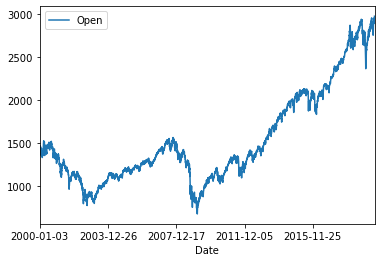

In [4]:
ax = plt.gca()
df.plot(kind = 'line', y = 'Open', ax = ax)
plt.show()

In [5]:
df.index= pd.to_datetime(df.index)

## Data preparation

Current dataset does not have continuous dates in the index because the prices are only available on weekdays. 



In [6]:
df = df.asfreq(freq = 'D', method = 'bfill')
df.head(10)

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000
2000-01-08,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000
2000-01-09,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000
2000-01-10,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000
2000-01-11,1457.599976,1458.660034,1434.420044,1438.560059,1438.560059,1014000000


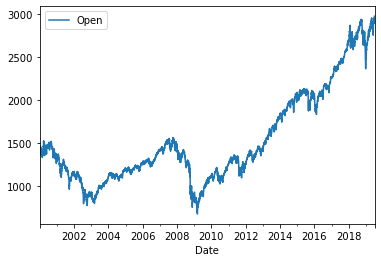

In [7]:
df.plot(kind = 'line', y = 'Open')
plt.show()

We need to create a column that contains the difference between the current Open price and the previous timeframe's Open.

In [8]:
df['first_diff'] = df['Open'].diff()

In [9]:
df.head()

,Open,High,Low,Close,Adj Close,Volume,first_diff
Date,,,,,,,
2000-01-03,1469.250000,1478.000000,1438.359985,1455.219971,1455.219971,931800000,NaN
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-14.030029
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,-55.799927
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,2.689941
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1.339966


In [10]:
df = df[1:]
df.head()

,Open,High,Low,Close,Adj Close,Volume,first_diff
Date,,,,,,,
2000-01-04,1455.219971,1455.219971,1397.430054,1399.420044,1399.420044,1009000000,-14.030029
2000-01-05,1399.420044,1413.270020,1377.680054,1402.109985,1402.109985,1085500000,-55.799927
2000-01-06,1402.109985,1411.900024,1392.099976,1403.449951,1403.449951,1092300000,2.689941
2000-01-07,1403.449951,1441.469971,1400.729980,1441.469971,1441.469971,1225200000,1.339966
2000-01-08,1441.469971,1464.359985,1441.469971,1457.599976,1457.599976,1064800000,38.020020


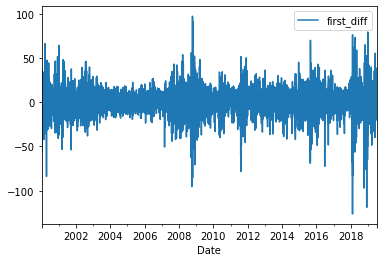

In [11]:
df.plot(kind = 'line', y = 'first_diff')
plt.show()

Although the graph may seem stationary, we will use a statistical test called the Augmented Dickey Fuller Test. The null hypothesis will be that the plot is not stationary and the alternative will be that it is not.

In [15]:
from statsmodels.tsa.stattools import adfuller

In [16]:
adfuller(df['first_diff'])

(-33.69507979331624,
 0.0,
 6,
 7112,
 {'1%': -3.4312698062157825,
  '5%': -2.861946481457177,
  '10%': -2.56698636599638},
 56206.52371807047)

Since the p-value of the 'first_diff' column is less than 0.05, we can reject the null hypothesis and conclude that the graph is stationary.